In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import numpy as np

**MTA dataset information from 2019, 2020, 2021 separately**

In [35]:
mta_2019 = pd.read_csv('https://raw.githubusercontent.com/sateshr/VisualAnalytics/main/mta-2019.csv')
mta_2020 = pd.read_csv('https://raw.githubusercontent.com/sateshr/VisualAnalytics/main/mta-2020.csv')
mta_2021 = pd.read_csv('https://raw.githubusercontent.com/sateshr/VisualAnalytics/main/mta-2021.csv')

**combine all the dataset subsets**

In [36]:
mta_data = pd.concat([mta_2019, mta_2020,mta_2021 ], sort = False)
mta_data.head()

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-01,5896.0,5319.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-02,14472.0,9702.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-03,15674.0,12234.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-04,15534.0,13489.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2019-01-05,7813.0,8937.0


In [22]:
mta_data.shape

(450242, 12)

In [6]:
columns = ['gtfs_longitude','gtfs_latitude', 'complex_id' ]
mta_data = mta_data.drop(columns, axis=1)

In [23]:
# group by the data by month
mta_data.index = pd.to_datetime(mta_data['date'])
mta_month_data = mta_data.groupby(pd.Grouper(freq ='M')).sum()
last_row = len(mta_month_data)
mta_month_data = mta_month_data.drop(mta_month_data.index[last_row-1])
mta_month_data.tail()

,gtfs_longitude,gtfs_latitude,complex_id,entries,exits
date,,,,,
2021-07-31,-973701.255536,536406.138149,3540967,53370849.0,62229095.0
2021-08-31,-973331.886301,536202.778399,3541160,52363518.0,61730815.0
2021-09-30,-941540.927612,518689.486473,3426584,57671862.0,67738313.0
2021-10-31,-974070.873449,536610.051708,3543548,64575793.0,75910135.0
2021-11-30,-942946.443114,519466.249328,3434368,62779052.0,75045252.0


In [24]:
mta_month_data['scaled_entries'] = mta_month_data['entries']/10000
mta_month_data.tail()

,gtfs_longitude,gtfs_latitude,complex_id,entries,exits,scaled_entries
date,,,,,,
2021-07-31,-973701.255536,536406.138149,3540967,53370849.0,62229095.0,5337.0849
2021-08-31,-973331.886301,536202.778399,3541160,52363518.0,61730815.0,5236.3518
2021-09-30,-941540.927612,518689.486473,3426584,57671862.0,67738313.0,5767.1862
2021-10-31,-974070.873449,536610.051708,3543548,64575793.0,75910135.0,6457.5793
2021-11-30,-942946.443114,519466.249328,3434368,62779052.0,75045252.0,6277.9052


# covid-19 cases dataset

In [25]:
url = 'https://raw.githubusercontent.com/yxiang001/covid_monthly_export/main/covid_monthly_export%20(2).csv'
covid_data = pd.read_csv(url)
covid_data.head()

,date_of_interest,CASE_COUNT
0,2020-02,1
1,2020-03,5458
2,2020-04,2022
3,2020-05,230
4,2020-06,441


In [26]:
covid_data.dtypes

date_of_interest    object
CASE_COUNT           int64
dtype: object

In [28]:
covid_data['date_of_interest'] = pd.to_datetime(covid_data['date_of_interest'])

## Citi Bike dataset

In [27]:
citi_bike = pd.read_csv('https://raw.githubusercontent.com/yxiang001/citibike-dataset/main/citibike-all-agg-data.csv')
citi_bike.head()

,Unnamed: 0,trips,avg_trip,subscribers,customers
0,2019-01-01,21962,1175.926646,17297,4665
1,2019-01-02,37797,780.931185,35313,2484
2,2019-01-03,41676,769.524139,39845,1831
3,2019-01-04,43922,778.148786,41574,2348
4,2019-01-05,17432,811.470801,16642,790


In [29]:
citi_bike.shape

(1064, 5)

In [30]:
citi_bike.dtypes

Unnamed: 0      object
trips            int64
avg_trip       float64
subscribers      int64
customers        int64
dtype: object

In [31]:
citi_bike.isnull().sum()

Unnamed: 0     0
trips          0
avg_trip       0
subscribers    0
customers      0
dtype: int64

In [32]:
# group the data by month
citi_bike.index = pd.to_datetime(citi_bike['Unnamed: 0'])
citi_bike_month = citi_bike.groupby(pd.Grouper(freq ='M')).sum()
citi_bike_month.tail()

,trips,avg_trip,subscribers,customers
Unnamed: 0,,,,
2021-07-31,3084537,33356.0,2021205,1063332
2021-08-31,3072478,32312.0,1864076,1208402
2021-09-30,3280221,31535.0,1889712,1390509
2021-10-31,3069239,32799.0,2262714,806525
2021-11-30,2159283,29798.0,1684538,474745


### scale the data for better visualization

In [33]:
citi_bike_month['scale_avg_trip'] = citi_bike_month['avg_trip']/10
citi_bike_month.head()

,trips,avg_trip,subscribers,customers,scale_avg_trip
Unnamed: 0,,,,,
2019-01-31,967287,24164.412151,927114,40173,2416.441215
2019-02-28,943744,22518.384848,897393,46351,2251.838485
2019-03-31,1327960,26933.436073,1221302,106658,2693.343607
2019-04-30,1766094,31415.984294,1536661,229433,3141.598429
2019-05-31,1924563,32900.699307,1629997,294566,3290.069931


## plot the grap

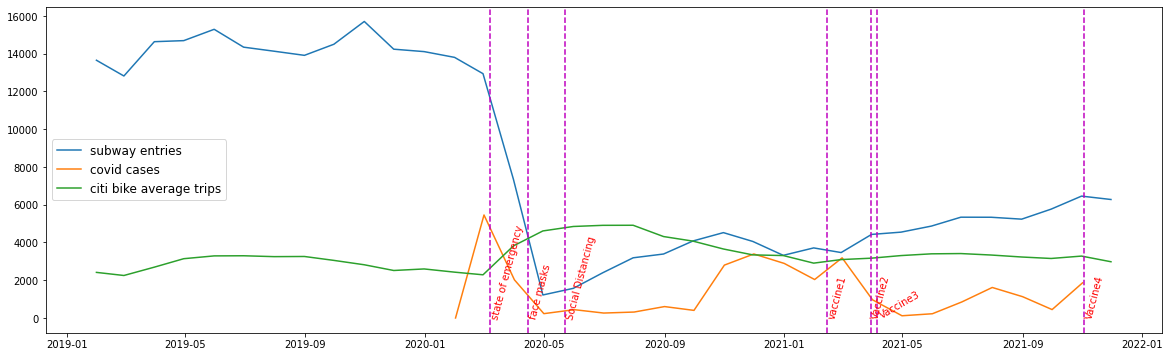

In [17]:
event_time = pd.to_datetime(['2020-03-07', '2020-04-15', '2020-05-23', '2021-02-14', '2021-03-30', '2021-11-03', '04-06-2021'])
event_label = ['state of emergency', 'face masks', 'Social Distancing', 'vaccine1', 'Vaccine2', 'Vaccine4', 'Vaccine3']
fig, axs = plt.subplots(figsize=(20, 6))
sns.lineplot(data = mta_month_data, x='date', y="scaled_entries").set(xlabel=None, ylabel=None)
sns.lineplot(data = covid_data, x='date_of_interest', y="CASE_COUNT").set(xlabel=None, ylabel=None)
sns.lineplot(data = citi_bike_month, x='Unnamed: 0', y="scale_avg_trip").set(xlabel=None, ylabel=None)
plt.legend(labels=["subway entries","covid cases", "citi bike average trips"], fontsize = 'large')
for i in np.arange(6):
  plt.axvline(x=event_time[i], c='m', linestyle = '--')
  plt.text(event_time[i], .5, event_label[i], rotation = 75, c='r')
plt.axvline(x=event_time[6], c='m', linestyle = '--')
plt.text(event_time[6], 0.5, event_label[6], rotation = 30, c='r')
plt.show()

## terminology of the event
* state of emergency: March 7, 2020, NY Governor Andrew Cuomo declares a state of emergency
* April 15, 2020: Governor Cuomo requires face masks or coverings in public places
* May 23, 2020: Governor Cuomo allows gatherings of up to 10 people with social distancing
* vaccine1： 02/14/2021 New Yorkers with underlying conditions become eligible for COVID-19 vaccine
* vaccine2： 03/30/2021	New Yorkers age 30 and up are eligible for a vaccine
* vaccine3： 04/06/2021 New Yorkers age 16 and up are eligible for a vaccine
* vaccine4： 11/03/2021 vaccine available for ages 5 through 11 years of age.

## Interpretation
* After Covid-19, CDC，governor and news media are keep telling people to keep social distance, wear face mask and get vaccine to keep safe from covid-19. Our friends or family who didn't wear face mask or keep social distance, some of them even didn't get vaccine. they still didn't get infected by covid-19. While some people did follow the mandates like keep social distance and wear face mask, but they got the covid. As an ordinary person, sometimes I would doubt whether those mandates really work. As a data science student, I collected the data and analysis it. let the data tell us the true. 
* According to this line plot, which including the covid-19 cases, citi bike average trips and subway entries, we can see that there are some relation between them. 
* 1) After NY Governor Andrew Cuomo declares a state of emergency on March 7, 2020, as the plot shows that the covid-19 case and subway entries drops rapidly, while the bike average trips increased. Part of the people choose bike instead of subway for commute instead of subway. 
* 2) After a short period, Governor Cuomo requires face masks and keep social distance, the covid-19 case keep lower amount even without vaccine.
* 3) After February 14th, 2021, Vaccines are being made available to people. Covid-19 case droped again to lower level and subway entries increase a little compare to before. Bike average trips are back to similar amount as before covid-19. 
* 4) So government mandates, and people's behave like keep social distance, wear face wear, and vaccine did help us to protect from covid-19

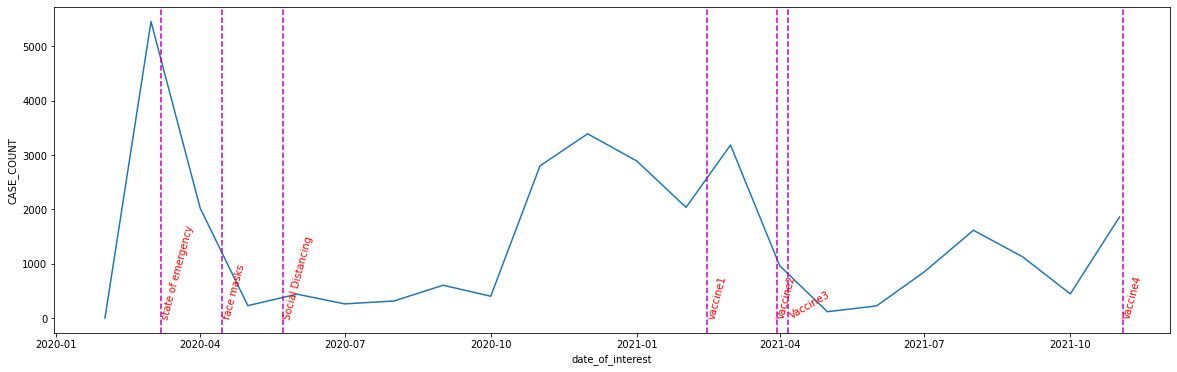

In [37]:
fig, axs = plt.subplots(figsize=(20, 6))
sns.lineplot(data = covid_data, x='date_of_interest', y="CASE_COUNT")
for i in np.arange(6):
  plt.axvline(x=event_time[i], c='m', linestyle = '--')
  plt.text(event_time[i], .5, event_label[i], rotation = 75, c='r')
plt.axvline(x=event_time[6], c='m', linestyle = '--')
plt.text(event_time[6], 0.5, event_label[6], rotation = 30, c='r')
plt.show()
